In [ ]:
import pandas as pd

In [ ]:
transcations= pd.read_csv('Retail_Data_Transactions.csv')
transcations

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [ ]:
response= pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [ ]:
df= transcations.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [ ]:
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [ ]:
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [ ]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [ ]:
#Data cleaning part mo

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df


,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [ ]:
#changing the data types

df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype('int64')

C:\Users\lahar\AppData\Local\Temp\ipykernel_31864\535194771.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\lahar\AppData\Local\Temp\ipykernel_31864\535194771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\lahar\AppData\Local\Temp\ipykernel_31864\535194771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [ ]:
# check for outliers
#Z-SCORE

from scipy import stats
import numpy as np

#calc z score
z_scores= np.abs(stats.zscore(df['tran_amount']))

#set a threshold

threshold= 3

outliers= z_scores>threshold


print(df[outliers])


Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [ ]:
# check for outliers
#Z-SCORE

from scipy import stats
import numpy as np

#calc z score
z_scores= np.abs(stats.zscore(df['response']))

#set a threshold

threshold= 3

outliers= z_scores>threshold


print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


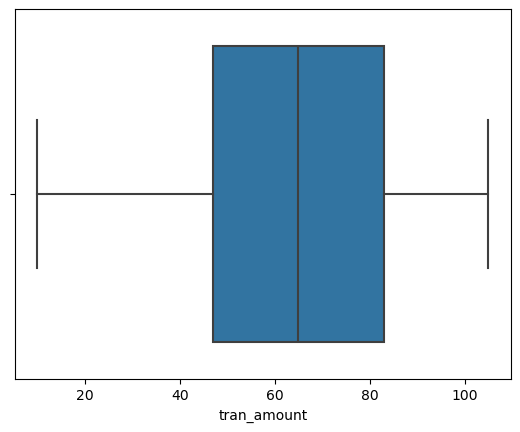

In [ ]:
#second method of finding outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()moon

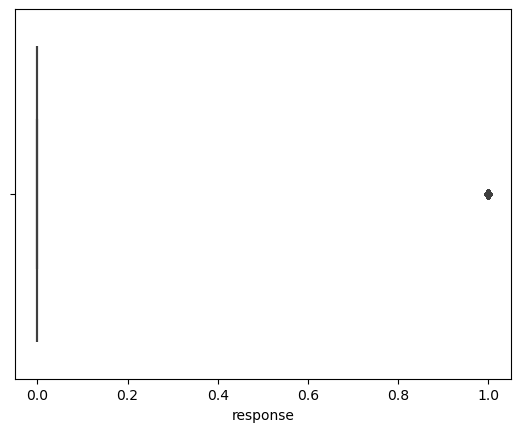

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['response'])
plt.show()

In [ ]:
# Calculate the IQR
q25 = df['trans_date'].quantile(0.25)
q75 = df['trans_date'].quantile(0.75)
iqr = q75 - q25

# Define lower and upper bounds
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

# Identify outliers
outliers = df[(df['trans_date'] < lower_bound) | (df['trans_date'] > upper_bound)]
print(outliers)


Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [ ]:
# so there are no outliers in the data
# Lets create the additional  colums so here iam creating month,year ,day
df['month']= df['trans_date'].dt.month
df['year']= df['trans_date'].dt.year
df['day']= df['trans_date'].dt.day



C:\Users\lahar\AppData\Local\Temp\ipykernel_31864\3335130513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']= df['trans_date'].dt.month
C:\Users\lahar\AppData\Local\Temp\ipykernel_31864\3335130513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']= df['trans_date'].dt.year
C:\Users\lahar\AppData\Local\Temp\ipykernel_31864\3335130513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [ ]:
df

,customer_id,trans_date,tran_amount,response,month,year,day
0,CS5295,2013-02-11,35,1,2,2013,11
1,CS4768,2015-03-15,39,1,3,2015,15
2,CS2122,2013-02-26,52,0,2,2013,26
3,CS1217,2011-11-16,99,0,11,2011,16
4,CS1850,2013-11-20,78,0,11,2013,20
...,...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011,26
124996,CS7232,2014-08-19,38,0,8,2014,19
124997,CS8731,2014-11-28,42,0,11,2014,28
124998,CS8133,2013-12-14,13,0,12,2013,14


In [ ]:
#so now lets start our analysis to gain insights
#1.3 months having highest transctions amount
monthly_Sales= df.groupby('month')['tran_amount'].sum()
monthly_Sales= monthly_Sales.sort_values(ascending=False).reset_index().head(3)
monthly_Sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [ ]:
2.#last 3 months having lowest transactions
monthly_Sales= df.groupby('month')['tran_amount'].sum()
monthly_Sales= monthly_Sales.sort_values(ascending=True).reset_index().head(3)
monthly_Sales

,month,tran_amount
0,4,515746
1,5,633162
2,3,636475


In [ ]:
#years having highest transctions amount
Year_Sales= df.groupby('year')['tran_amount'].sum()
Year_Sales= Year_Sales.sort_values(ascending=False).reset_index().head(3)
Year_Sales

,year,tran_amount
0,2013,2137140
1,2012,2115542
2,2014,2094508


In [ ]:
#1.Months having highest transction orders
customer_counts= df['month'].value_counts().reset_index()
customer_counts.columns=['month','count']

# sort

top_5_months= customer_counts.sort_values(by='count', ascending=False).head(5)
top_5_months

,month,count
0,8,11195
1,10,11175
2,1,11144
3,7,11033
4,12,10963


In [ ]:
#1 customers having highest transcationalorder

customer_counts= df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']

# sort

top_5_cus= customer_counts.sort_values(by='count', ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

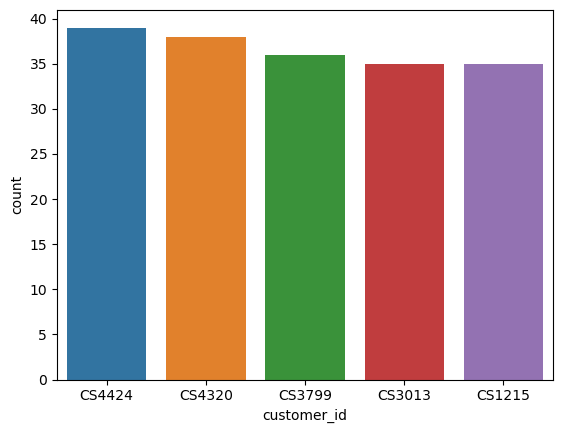

In [ ]:
sns.barplot(x='customer_id',y='count',data=top_5_cus)

In [ ]:
customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

# sort

top_5_sal= customer_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_sal

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

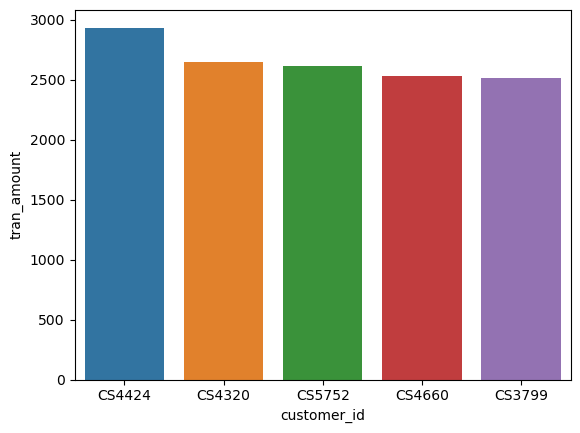

In [ ]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sal)

In [ ]:
# from the above two things i  can conclude that even though there are three repeaeted customers but there are not valuble to us
#counting no_of_customers per year
df['Count_y'] = df.groupby(df['trans_date'].dt.to_period('Y'))['customer_id'].transform('count')


C:\Users\lahar\AppData\Local\Temp\ipykernel_31864\1385376116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count_y'] = df.groupby(df['trans_date'].dt.to_period('Y'))['customer_id'].transform('count')


In [ ]:
df

,customer_id,trans_date,tran_amount,response,month,year,day,Count_y
0,CS5295,2013-02-11,35,1,2,2013,11,32900
1,CS4768,2015-03-15,39,1,3,2015,15,6671
2,CS2122,2013-02-26,52,0,2,2013,26,32900
3,CS1217,2011-11-16,99,0,11,2011,16,20651
4,CS1850,2013-11-20,78,0,11,2013,20,32900
...,...,...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011,26,20651
124996,CS7232,2014-08-19,38,0,8,2014,19,32226
124997,CS8731,2014-11-28,42,0,11,2014,28,32226
124998,CS8133,2013-12-14,13,0,12,2013,14,32900


In [ ]:

#top 3 years with highest no of customers
customer_counts = df.groupby(df['trans_date'].dt.year)['customer_id'].nunique()

# Get the top 3 years
top_3_years = customer_counts.nlargest(3)
top_3_years

trans_date
2012    6804
2013    6801
2014    6801
Name: customer_id, dtype: int64

In [ ]:
#going to do some analysis on response as well
#1.counting no of customers with 0 response
count_zero = df['response'].value_counts()[0]
count_zero

111127

In [ ]:
count_one = df['response'].value_counts()[1]
count_one

13842

C:\Users\lahar\AppData\Local\Temp\ipykernel_31864\3994137081.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year'] = df['trans_date'].dt.to_period('M')


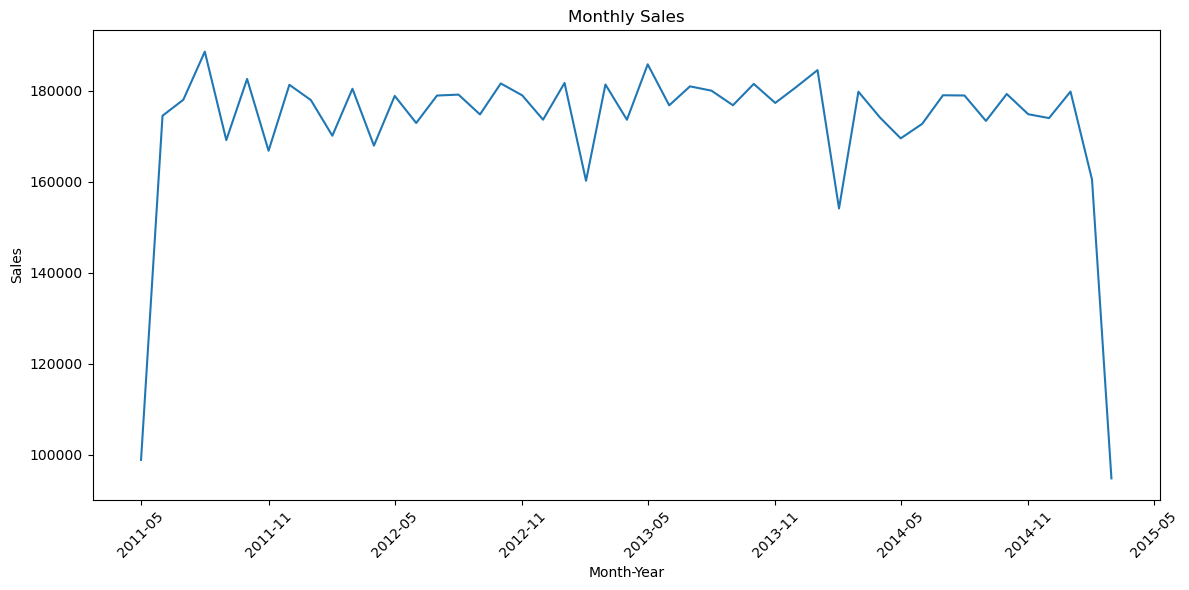

In [ ]:
#Now Lets us do the adavances statics
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['month_year'] = df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

# Convert the PeriodIndex to DateTimeIndex
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))  # Increase the size of the figure
plt.plot(monthly_sales.index, monthly_sales.values)  # Plot the data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set the x-axis interval
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.tight_layout()  # Adjust the layout for better visibility
plt.show()



C:\Users\lahar\AppData\Local\Temp\ipykernel_31864\3300644522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['trans_date'].dt.to_period('Y')


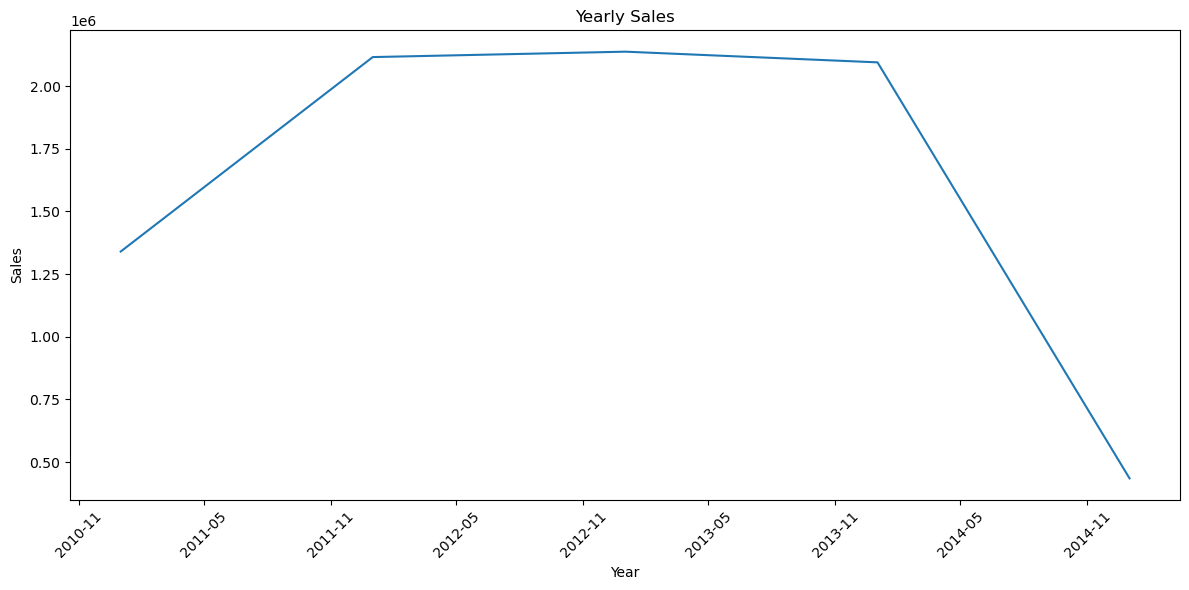

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['year'] = df['trans_date'].dt.to_period('Y')
monthly_sales = df.groupby('year')['tran_amount'].sum()

# Convert the PeriodIndex to DateTimeIndex
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))  # Increase the size of the figure
plt.plot(monthly_sales.index, monthly_sales.values)  # Plot the data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set the x-axis interval
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Yearly Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.tight_layout()  # Adjust the layout for better visibility
plt.show()


C:\Users\lahar\AppData\Local\Temp\ipykernel_31864\3430953999.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['trans_date'].dt.to_period('D')


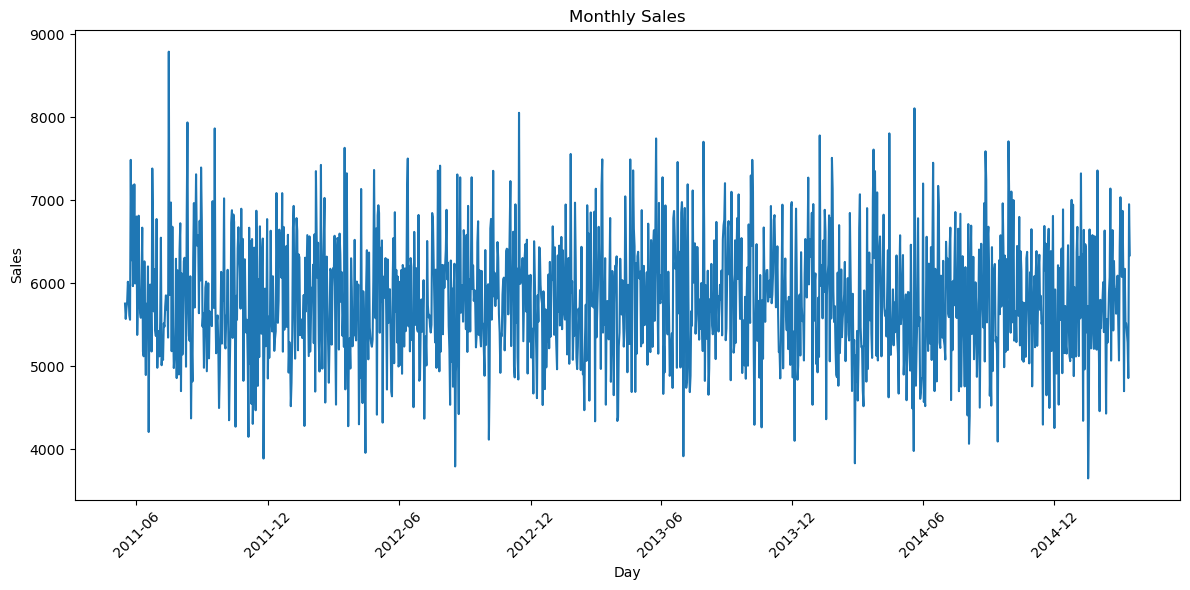

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['day'] = df['trans_date'].dt.to_period('D')
monthly_sales = df.groupby('day')['tran_amount'].sum()

# Convert the PeriodIndex to DateTimeIndex
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))  # Increase the size of the figure
plt.plot(monthly_sales.index, monthly_sales.values)  # Plot the data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set the x-axis interval
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.tight_layout()  # Adjust the layout for better visibility
plt.show()


In [ ]:
#Cohert Segementation

# Recency will be the maximum of trans_date
recency = df.groupby('customer_id')['trans_date'].max()

# Frequency will be the count of transactions
frequency = df.groupby('customer_id')['trans_date'].count()

# Monetary will be the sum of tran_amount
monetary = df.groupby('customer_id')['tran_amount'].sum()

# Combine all three into a DataFrame
rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary})




In [ ]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [ ]:
response= pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


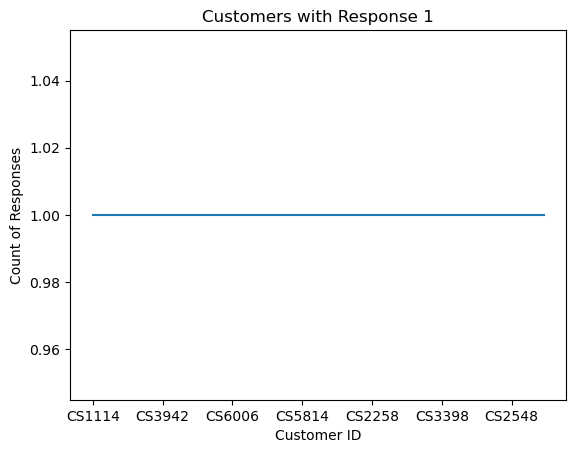

In [ ]:

# Filter the DataFrame to include only customers with a response of 1
response_df = response[response['response'] == 1]

# Plot the graph
# Assuming you want to plot the count of responses, here's a simple bar graph
response_df['customer_id'].value_counts().plot(kind='line')
plt.title('Customers with Response 1')
plt.xlabel('Customer ID')
plt.ylabel('Count of Responses')
plt.show()


In [ ]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


<Axes: xlabel='recency', ylabel='frequency'>

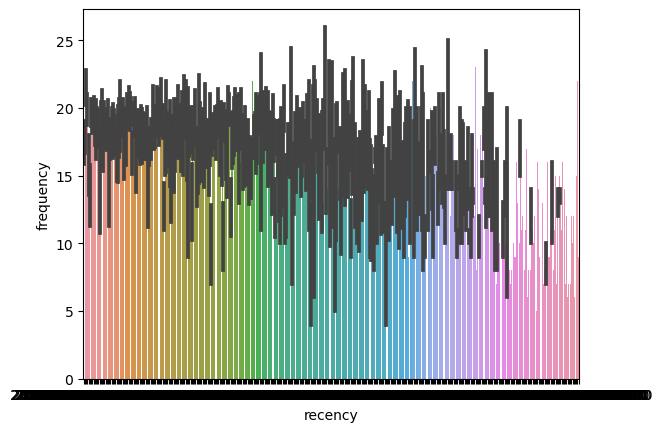

In [ ]:
sns.barplot(x='recency',y='frequency',data=rfm)

In [ ]:
def segment_customer(row):
    if row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary'] > 1000:
        return 'P0'
    elif (2011 <= row['recency'].year < 2012) and (10 < row['frequency'] <= 15) and (500 < row['monetary'] <= 1000):
        return 'P1'
    else:
        return 'P2'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)


In [ ]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


<Axes: xlabel='Segment', ylabel='frequency'>

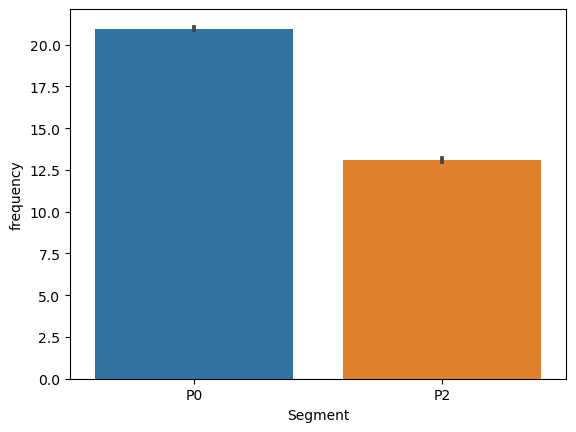

In [ ]:

sns.barplot(x='Segment', y='frequency' , data=rfm)

<Axes: xlabel='recency', ylabel='monetary'>

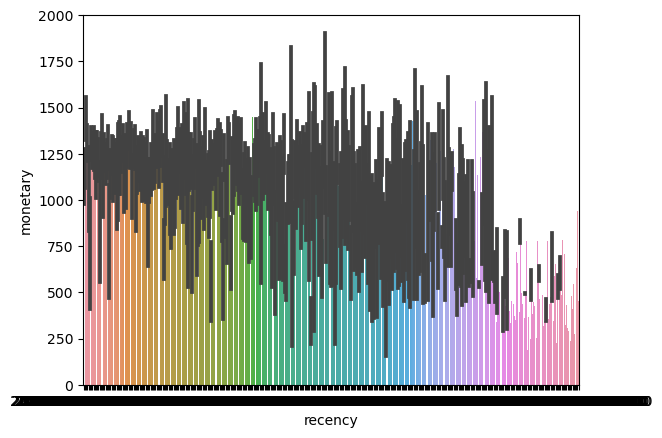

In [ ]:
sns.barplot(x='recency',y='monetary',data=rfm)

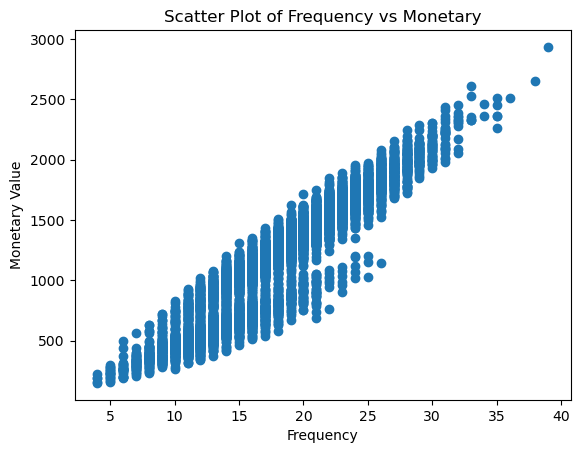

In [ ]:
plt.scatter(rfm['frequency'], rfm['monetary'])
plt.title('Scatter Plot of Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.show()

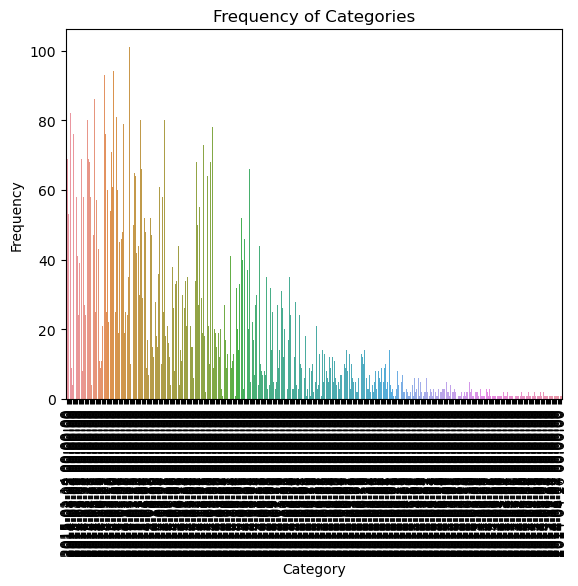

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'category_column' is the name of your categorical column
# Replace 'df' and 'category_column' with the actual names of your DataFrame and column

sns.countplot(x='recency', data=rfm)
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # This rotates the category labels to prevent overlap
plt.show()


<Axes: xlabel='month', ylabel='response'>

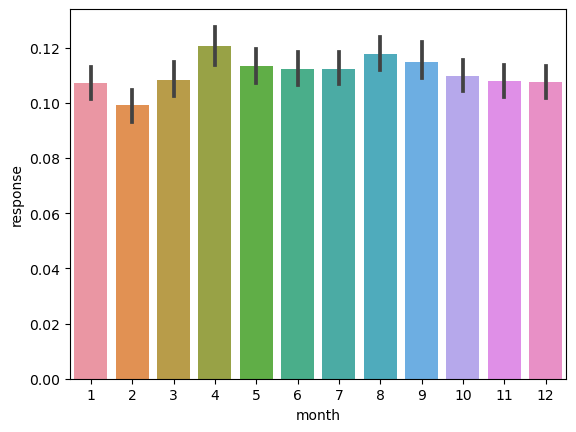

In [ ]:
sns.barplot(x='month',y='response',data=df)

<Axes: xlabel='year', ylabel='response'>

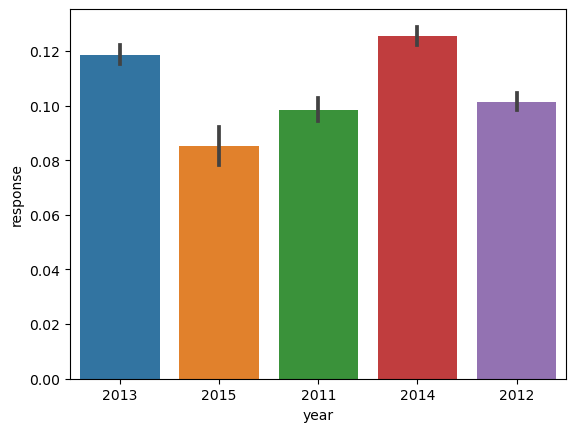

In [ ]:
sns.barplot(x='year',y='response',data=df)

In [ ]:
sns.barplot(x='count_y',y='month',data=df)

ValueError: Could not interpret input 'count_y'